In [101]:
#Импорт необходимых инструментов для проекта
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
# Функция для анализа датасета 1
def draw_graph_dataset(data: object) -> None:
    """Строит графики для анализа первого датасета

    Параметры:
        data (object): Dataframe с данными о наличии диабета
    """
    
    # Коробочная диаграмма распределения возраста в разрезе наличия/отсутствия диабета в выборке
    fig, ax = plt.subplots()
    sns.boxplot(
        data=data,
        x='Age',
        hue='Outcome',
        gap=.1,
        ax=ax
    );
    ax.set_title(f'Boxplot show age of patients with/without diabetes')
    
    # Построение гистограмм основных показателей из дата сета в разрезе наличия/отсутствия диабета
    list_columns = ['Age', 'Pregnancies', 'BMI']
    fig, axes = plt.subplots(1, len(list_columns), figsize=(20,5))
    for index, name in enumerate(list_columns):
        sns.histplot(
            data=data,
            x=name,
            hue='Outcome',
            ax=axes[index]
        );
        axes[index].set_title(f'Histogram show count patient with/without diabetes of {name}')

# Функция переименования столбцов в датафрейме
def data_columns_rename(df:object, columns_dict:dict) -> None:
    """Переименовывает наименования колонок в DataFrame

    Параметры:
        df (object): DataFrame, где требуется переименовать колонку
        columns_dict (dict): Словарь, где ключ старое наименование, а значение новое
    """
    df.rename(columns=columns_dict, inplace=True)

# Функция объеднения датасетов и удаление ненужных столбцов
def concat_and_drop(data1:object, data2:object) -> object:
    """Объединяет и удаляет неповторяющиеся столбцы в обоих датасетах

    Args:
        data1 (object): Датасет 1
        data2 (object): Датасет 2

    Returns:
        object: Объединенный DataFrame, который не содержит лишних столбцов
    """
    # Определяем наименование колонок, которые не попадают в оба датасета и должны быть удалены
    list_cols_drop = list(set(data1.columns) ^ set(data2.columns))
    # Объединяем два дата сета
    df = pd.concat([data1, data2], ignore_index=True)
    # Удаляем лишние колонки
    df.drop(columns=list_cols_drop, inplace=True)
    
    return df

# Функция очистки данных от пустых значений
def clean_nan(data: object) -> object:
    """Очищает датасет от пустых значений. Так как количество данных (пустых) составляет ниже 10 процентов (а также с учетом того что 3 датасет содержит большое количество данных). 
    Предлагается этими данными принебречь в данной выборке

    Args:
        data (object): Датасет с пустыми данными

    Returns:
        object: Датасет без пустых данных
    """
    # Расчет количества пустых данных
    cols_null_percent = data.isnull().mean() * 100
    cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
    display(cols_with_null)
    
    # Смотрим процентовку пустых значений и столбцы, где пропусков больше 30 - удаляем полностью
    # Лишнее действие, сначало думал, что пустых значений будет больше, решил оставить этот цикл.
    for index, values in cols_with_null.items():
        if values >= 30:
            data.drop(columns=[index], inplace = True)
    
    # Удаляем строки где есть пропуски, так как таких строк очень мало
    data = data.dropna(how='any', axis=0)
    
    return data

# Функция преобразования типа колонки
def data_type_edit(data: object, elements: dict) -> None:
    """Преобразует тип колонки

    Args:
        data (object): DataFrame с выборкой данных
        elements (dict): Словарь, где ключ - наименование колонки, значение - тип в который преобразовать
    """
    for key, value in elements.items():
        data[key] = data[key].astype(value)
    
# Функция построения двух графиков для анализа результатов первого датасета и объединенного
# К сожалению, я так и не придумал как сделать все отображения одной функцией
def draw_graph_compare(data1:object, data2:object) -> None:
    """Строит графики для сравнения первого датасета и объединенного

    Args:
        data1 (object): Датасет 1
        data2 (object): Объединенный датасет 1 + 2
    """
    # Делаем выборки по пациентам в обоих датасетах, у которых подтвержден диабет
    data1_sort = data1[data1['Diabetes'] == 1]
    data2_sort = data2[data2['Diabetes'] == 1]
    
    fig, axes = plt.subplots(3, 2, figsize=(20,15))
    fig.suptitle('Compare Dataset 1 and Dataset 1+2')
        
    # Построим коробочные диаграммы возрастов в выборке обоих датасетов
    # Слева: датасет 1. Справа: датасет 1+2
    sns.boxplot(data=data1, x='Age', ax=axes[0][0]);
    axes[0][0].set_title('Dataset 1. Boxplot of patients by age')
    sns.boxplot(data=data2, x='Age', hue='Sex', gap=.1, ax=axes[0][1]);
    axes[0][1].set_title('Dataset 1 and Dataset2. Boxplot of patients by age')
    
    # Построим коробочные диаграммы двух датасетов по возрасту пациентов у которых подтвержден диабет
    sns.boxplot(data=data1_sort, x='Age', ax=axes[1][0]);
    axes[1][0].set_title('Dataset 1. Boxplot of patients with diabet by age')
    sns.boxplot(data=data2_sort, x='Age', hue='Sex', gap=.1, ax=axes[1][1]);
    axes[1][1].set_title('Dataset 1 and Dataset2. Boxplot of patients with diabet by age')
    
    # Построим гистограммы распределения BMI в обоих датасетах
    sns.histplot(data=data1_sort, x='BMI', alpha=1, ax=axes[2][0]);
    sns.histplot(data=data2_sort, x='BMI', color='orange', alpha=0.3, ax=axes[2][0]);
    axes[2][0].set_title('Dataset 1 and Dataset 1+2. Histogram of patients with diabet by BMI');
    
    # Построим гистограмму распределения Glucose относительно BMI в обоих датасетах
    sns.histplot(data=data2_sort, x='BMI', y='Glucose', ax=axes[2][1]);
    axes[2][0].set_title('Dataset 1 and Dataset 1+2. Histogram of patients with diabet by Glucose of BMI');
    
    # Построим категориальный график по полу по наличию диабета
    sns.catplot(data=data2_sort, x='Age', y='Sex');
    
    # Построим lmplot уровня глюкозы в разрезе пола
    sns.lmplot(data=data2_sort, x='Age', y='Glucose', hue='Sex', aspect=3, height=5);

def get_age_category(age: int) -> int:
    """Получение возрастной категории по возрасту

    Args:
        age (int): Возраст

    Returns:
        int: 13 уровневая возрастная категория
    """
    # Создаем словарь категорий возрастов
    age_category ={
        1: list(range(18, 25)),
        2: list(range(25, 30)),
        3: list(range(30, 35)),
        4: list(range(35, 40)),
        5: list(range(40, 46)),
        6: list(range(46, 50)),
        7: list(range(50, 56)),
        8: list(range(56, 60)),
        9: list(range(60, 66)),
        10: list(range(66, 70)),
        11: list(range(70, 76)),
        12: list(range(76, 80)),
        13: list(range(80, 125))
    }
    
    # Цикл, который проверяет входной возраст и возвращает возрастную категорию
    for key, value in age_category.items():
        if age in value:
            return key
        
def change_age_category(data: object) -> None:
    """Заменяет возраст на возрастную категорию

    Args:
        data (object): DataFrame, где будет произведена замена возраста
    """
    # Для поля возраст идет замена на возрастную категорию
    data['Age'] = data['Age'].apply(get_age_category)

# Функция которая строит графики для итогового датасета
def draw_graph_result(data: object) -> None:
    """draw_graph_result позволяет построить графики для результирующего датасета

    Параметры:
        data (object): DataFrame с итоговой выборкой данных
    """
    # Получаем выборку пациентов с диабетом
    data_with_diabetes = data[data['Diabetes'] == 1]
    
    # Создаем subplots для графиков
    fig, axes = plt.subplots(2, 2, figsize=(20,10))
    fig.suptitle('Graphs result datasets')
        
    # Построим гистограмму по возрасту в разрезе наличия/отсутствия диабета
    sns.histplot(data=data, x='Age', bins=10, hue='Diabetes', ax=axes[0][0]);
    axes[0][0].set_title('Histogram of patients by age with/without diabetes')
    
    # Построим гистограмму распределения индекса массы тела у диабетиков и обычных людей
    sns.histplot(data=data, x='BMI', bins=30, hue='Diabetes', ax=axes[0][1])
    axes[0][1].set_title('Histogram of patients by BMI with/without diabetes')
    
    # Построим тепловую карту для анализа корреляционной матрицы данных
    data_with_diabetes_corr = data_with_diabetes.corr()
    sns.heatmap(data=data_with_diabetes_corr, annot=True, ax=axes[1][0])
    
    # Построим гистограмму наличия высокого давления среди диабетиков в разрезе пола
    sns.histplot(data=data_with_diabetes, x='HighBP', hue='Sex', ax=axes[1][1]);
    axes[1][1].set_title('Boxplot of patients by sex')

In [103]:
# Импортируем все необходимые датасеты в проект
diabets_data = pd.read_csv('datasets/diabetes.csv')
test_data = pd.read_csv('datasets/test.csv')
health_indicators_data = pd.read_csv('datasets/diabetes_012_health_indicators_BRFSS2015.csv')

# ЧТО ДЕЛАТЬ:
Вот первый датасет, который попал к вам на анализ.

Загрузите его к себе в ноутбук, охарактеризуйте имеющиеся колонки и число наблюдений. Проанализируйте, какие факторы связаны с развитием диабета, а какие нет.
Добавьте к вашим данным еще один датасет.

Определите, какие колонки в этих двух датасетах соответствуют одним и тем же параметрам, проконтролируйте, чтобы датасеты объединились по ним корректно.
Повторите ваш анализ с новыми данными, появились ли какие-то новые наблюдения и выводы?
Добавьте к вашим данным еще один датасет.

Подумайте, можно ли модифицировать уже имеющиеся у вас данные так, чтобы проанализировать эти три датасета вместе? (Подсказка: колонка HighBP из третьего датасета).
Имея все три датасета покажите самые интересные на ваш взгляд наблюдения.

## Шаг 1
Построим графики по датасету 1 и проанализируем их

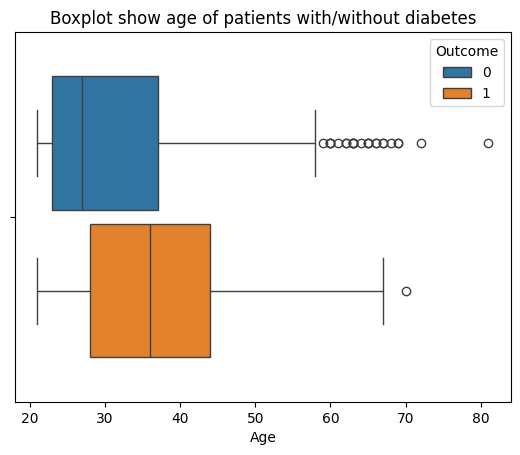

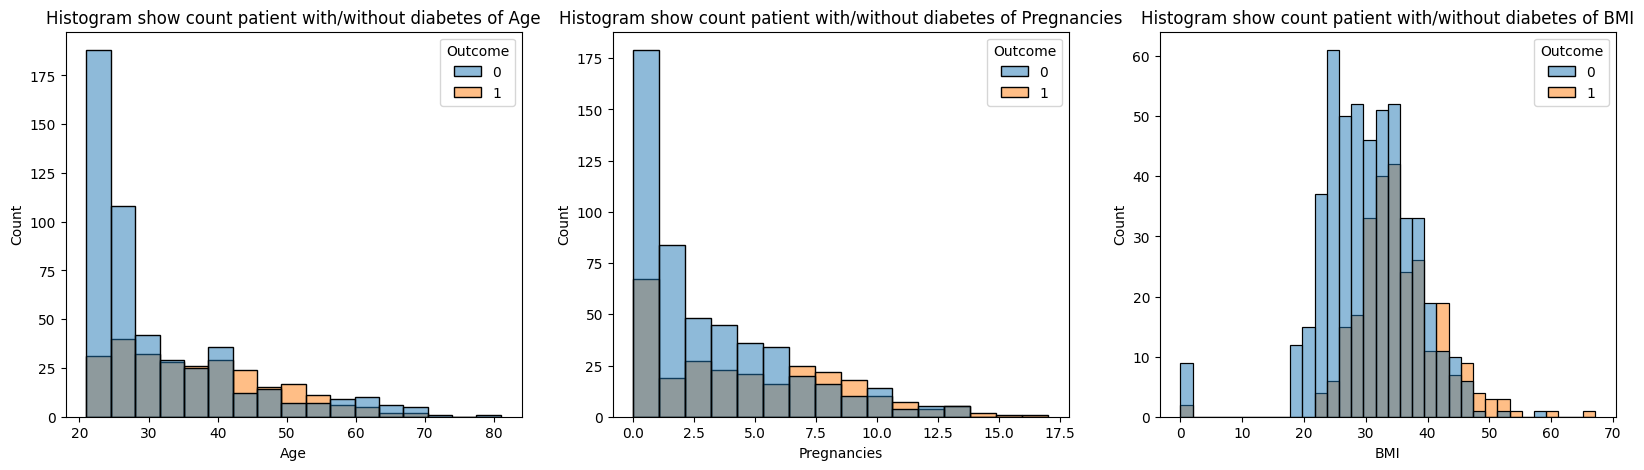

In [104]:
# Вызываем функцию построения графиков для анализа 1-го датасета        
draw_graph_dataset(diabets_data)

# Вывод по первому датасету:
По первому датасету можно обратить внимание, что основной возраст развития диабета среди женщин попадает в диапазон 28 - 44 лет. При этом в данном датасете особо не наблюдается развитие диабета с количеством беременности и показателем функции развития диабета. Стоит также отметить, что у пациентов с диабетом индекс массы тела варьирует в пределах 20 - 55, что соответствует избыточной массе тела. Из данного дата сета можно сделать вывод, что диабет развивается у людей с избыточным весом.

## Шаг 2
1. Сделаем предподготовку датасетов и объединим их
2. Удалим лишние столбцы
3. Произведем очистку данных
4. Построим новые графики
5. Проведем анализ

In [105]:
# Добавим колонку sex в датасет 1
diabets_data['Sex'] = 'F'
# Переименуем столбец Outcome в Diabets
data_columns_rename(diabets_data, {'Outcome': 'Diabetes'})


# Переименуем столбцы в датасете 2, чтоб они бились с датасет 1
# Словарь содержит список переименованных столбцов
columns_dict = {
        'sex': 'Sex', 
        'diabetes': 'Diabetes', 
        'diaBP': 'BloodPressure', 
        'glucose': 'Glucose',
        'age': 'Age'
    }
# Вызывается функция переименования столбца
data_columns_rename(test_data, columns_dict)

# Объединяем датасет1 и датасет2, а также удаляем неповторяющиеся колонки
df_concat = concat_and_drop(diabets_data, test_data)

# Проводим очистку данных от пустых значений
df_clean = clean_nan(df_concat)

Glucose    5.198020
BMI        0.309406
dtype: float64

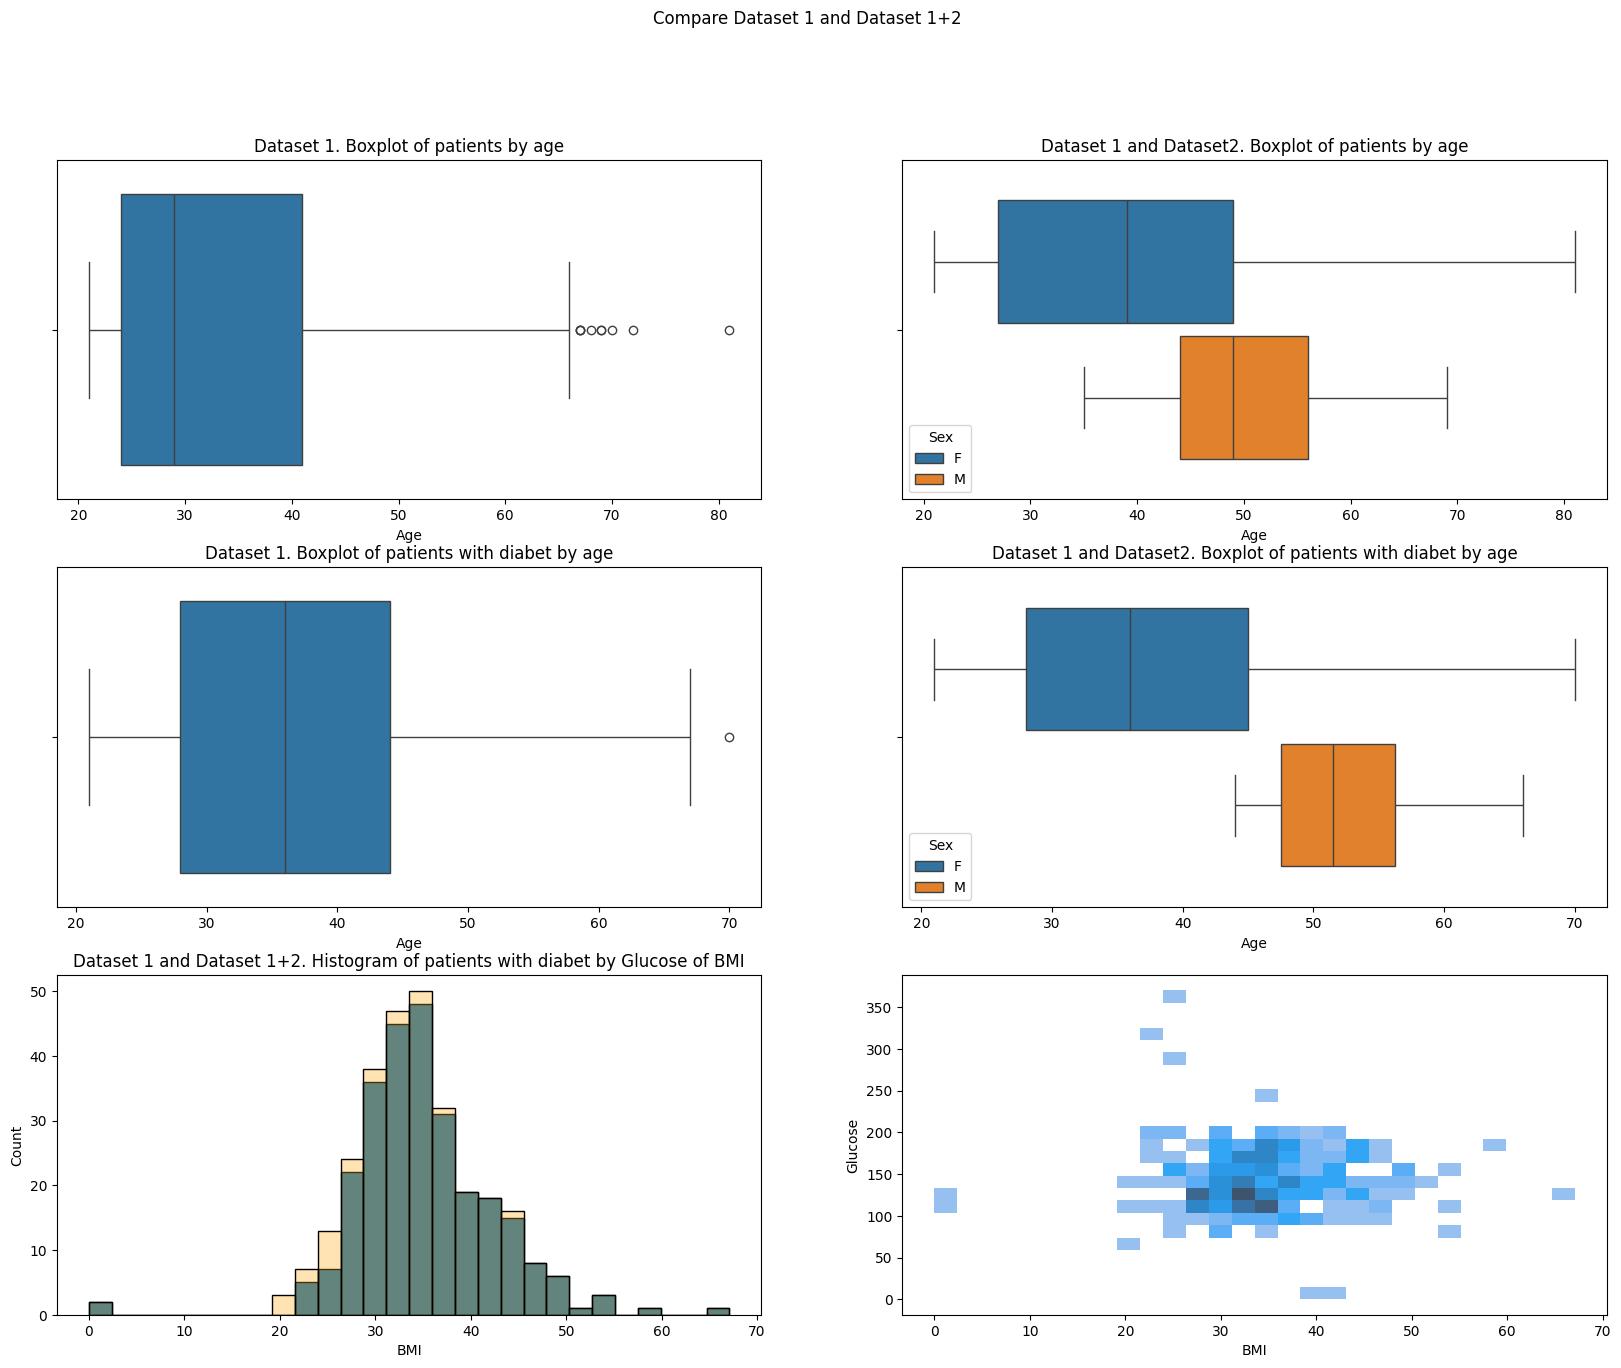

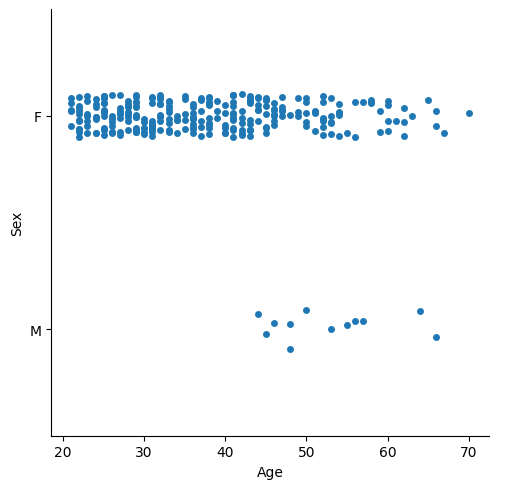

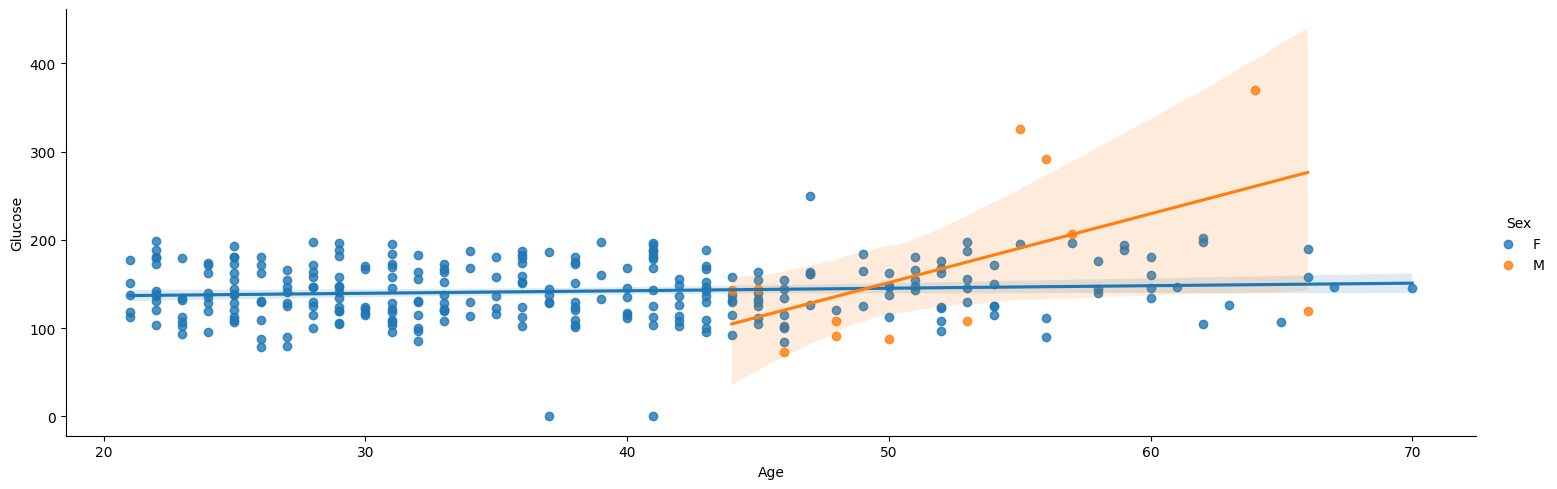

In [106]:
# Строим графики для анализа
draw_graph_compare(diabets_data, df_clean)

# Вывод по второму шагу
Согласно полученным графикам можно сделать следующие выводы:
1. Выборка расширена не только данными по женскому полу, но и по мужскому. Исходя из новой выборки преимущественная часть мужчин в возрасте 45 - 60 лет, количество женщин в выборке увеличилось, о чем говорит правая граница коробочной диаграммы
2. Большая часть мужчин с диабетов приходит на возраст 50 и старше. При этом преимущественный возраст женщин с диабетом увеличен немного.
3. У женщин распределение уровня глюкозы с возрастом плюс/минус не меняется. У мужчин наоборот с возрастом наблюдается рост уровня глюкозы в крови


# Шаг 3
1. Подготовить оба дата сета к объединению. Для этого сделаем следующее:
    - в объединенном датасете 1 и 2 добавим столбец HighBP, которое будет означать наличие высокого давления (будем считать, что оно выше значения 90, так как раннее в датасетах использовались дисталогическое АД). 1 - повышенное, 0 - нет
    - добавим столбец Diabetes в датасете health_indicators_data для пациентов у кого есть диабет (Diabetes_012	равен 2.0)
    - в столбце 'Sex' датасета health_indicators_data заменим 1 - M, 2 - F
    - для объединения приведем типу столбцов к единому типу данных
2. Объединим два датасета
3. Проведем очистку данных в случае пустых значений
4. Построим графики для анализа итогового датасета

In [107]:
# Добавим колонку HighBP в объединенный датасет 1 и 2
# Считаем, что показатель BloodPressure больше 90 соответствует высокому кровянному давлению
df_clean['HighBP'] = df_clean['BloodPressure'].apply(lambda x: 1 if x >= 90 else 0)

# Добавим в датасет health_indicators_data колонку наличия диабета Diabetes
health_indicators_data['Diabetes'] = health_indicators_data['Diabetes_012'].apply(lambda x: 1 if x == 2 else 0)

# Исправим значения колонки 'Sex' в health_indicators_data
df_clean['Sex'] = df_clean['Sex'].apply(lambda x: 1 if x == 'M' else 0)

# Заменим значение возраста на возрастную категорию в объединенном датасете
change_age_category(df_clean)

# Преобразуем тип столбцов HighBP, Age, в датасете health_indicators_data в тим int64
# Словарь содержит наименование колонки и тип данных
dict_col_type = {'HighBP': 'int64', 'Age': 'int64'}
# Вызываем функцию data_type_edit для преобразования типа колонки
data_type_edit(health_indicators_data, dict_col_type)

# Объединяем два датасета и удаляем колонки, которые не присутствуют в обоих датасетах
df_result = concat_and_drop(df_clean, health_indicators_data)

# Проверяем наличие пустых значений
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255209 entries, 0 to 255208
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   BMI       255209 non-null  float64
 1   Age       255209 non-null  int64  
 2   Diabetes  255209 non-null  int64  
 3   Sex       255209 non-null  float64
 4   HighBP    255209 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 9.7 MB


/var/folders/3p/n58r7gmj6zsg5vpzhh4b8d240000gn/T/ipykernel_7071/2455597109.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['HighBP'] = df_clean['BloodPressure'].apply(lambda x: 1 if x >= 90 else 0)
/var/folders/3p/n58r7gmj6zsg5vpzhh4b8d240000gn/T/ipykernel_7071/2455597109.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Sex'] = df_clean['Sex'].apply(lambda x: 1 if x == 'M' else 0)
/var/folders/3p/n58r7gmj6zsg5vpzhh4b8d240000gn/T/ipykernel_7071/2846027436.py:183: SettingWithCopyWarn

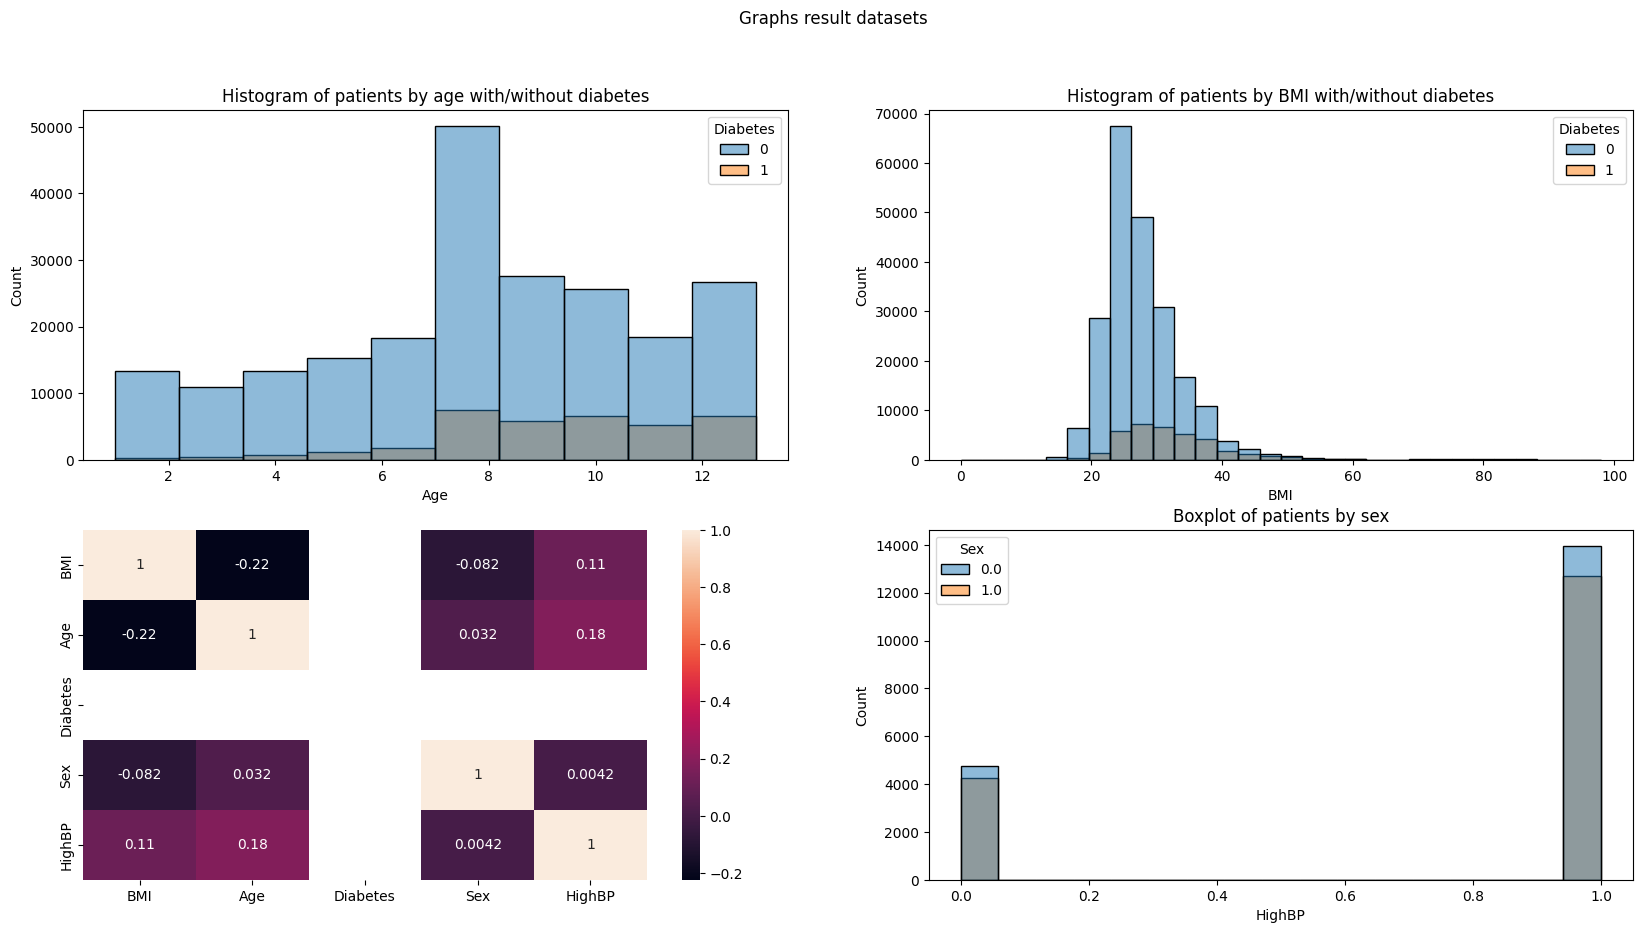

In [108]:
# Строим итоговые графики, используя ранее созданную функцию draw_graph_result передав тут результирующий датасет
draw_graph_result(df_result)

# Вывод:
1. Основные возрастные категории с диабетом идут от 8-го уровня (56 и старше), что означает, что диабет развивается с возрастом
2. При этом снова наблюдается, что диабет развивается у людей с высоким индексом массы тела.
3. У большого числа мужчин с диабетом наблюдается высокое АД, что может привести к сердечным болезням. Возможно это связано с образом жизни, у мужчин чаще наблюдается в жизни алкоголь/курение